<a href="https://colab.research.google.com/github/etmcrae/Project-2/blob/main/HousingProject2_EMCRAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


## Problem Defition



```
# This is formatted as code
```

Identify statistical relationships between housing variable(s) in which a user of such variables can assign reasonably high expectations homes with those attributes with sell with high margins of sale.

This is a supervised learning problem because we have the input variables (ie the housing attributes) and the outputs (saleprice).

## Data Collection

These initial first steps import libraries and the data source for analysis.

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
#this serves as an unmodified copy of the dataframe as a backup
url_UNMODIFIED = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
df_UNMODIFIED = pd.read_csv(url_UNMODIFIED)

In [3]:
#this is the dataframe imported from the url
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
df = pd.read_csv(url)

In [4]:
#this prints the first 5 rows of the dataframe
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [5]:
#This step performs multiple valuable summaries and pulls key information to gleam
#insights into the data set for an initial look at the overview of the data.
print(df.shape)
print(type(df.shape))
print(type(df.info))
print(df.describe().columns)
print(df.describe())
print(df.info)
print(df.dtypes)


(2637, 81)
<class 'tuple'>
<class 'method'>
Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')
                PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.637000e+03  2637.000000   2188.000000    2637.000000   2637.000000   
mean   7.141301e+08    57.349261     69.166819   10044.694729      6.097459   
std    1.887527e+08    42.499091     23.356779    6742.549521 

In [6]:
#This step looks at the occurance of null values throughout the dataset by columns,
#and sorts the columns by highest percent null values.
nulls = df.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / df.shape[0] * 100 ).round(1)


,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


## Data Cleaning

In [7]:
df.drop(['Alley','Mas Vnr Type','Fireplace Qu','Pool QC','Fence','Misc Feature',], axis = 1, inplace = True)

### This is an example changing the null values with the mode

In [8]:
# object-type columns
#ctrl a then ctrl + ? + down. try once and then twice
object_columns = df.select_dtypes(include=['object'])

for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
object_columns.isnull()

<ipython-input-8-a591f0f04125>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2637 non-null   object
 1   Street          2637 non-null   object
 2   Lot Shape       2637 non-null   object
 3   Land Contour    2637 non-null   object
 4   Utilities       2637 non-null   object
 5   Lot Config      2637 non-null   object
 6   Land Slope      2637 non-null   object
 7   Neighborhood    2637 non-null   object
 8   Condition 1     2637 non-null   object
 9   Condition 2     2637 non-null   object
 10  Bldg Type       2637 non-null   object
 11  House Style     2637 non-null   object
 12  Roof Style      2637 non-null   object
 13  Roof Matl       2637 non-null   object
 14  Exterior 1st    2637 non-null   object
 15  Exterior 2nd    2637 non-null   object
 16  Exter Qual      2637 non-null   object
 17  Exter Cond      2637 non-null   object
 18  Foundati

In [10]:
house_object_int = object_columns.copy()
house_object_int.drop(['Lot Config', 'Neighborhood', 'Condition 1',
'Condition 2', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual',
'Foundation', 'BsmtFin Type 2', 'Heating', 'Functional', 'Garage Type',
'Garage Qual', 'Sale Type', 'Sale Condition'], axis=1, inplace=True)


In [11]:
#each unique value will create a new column for onehot encoding.
#categorical and ordinal use the labelencoder because it doesnt require that
# Create an instance of labelencoder
labelencoder = LabelEncoder()

# Here we encode our categorical variables into integers.
columns_to_encode = ['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Land Slope',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive']
# For loop to integer encode selected categorical columns
for col in columns_to_encode:
    house_object_int[col] = labelencoder.fit_transform(house_object_int[col])

#rememer to drop everything else before this operation, then concatenate these object columns with the rest (integers and floats)

In [12]:
houseflo = df.select_dtypes(include = 'float64')

In [13]:
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    houseflo[col].fillna(houseflo[col].mean(), inplace=True)
houseflo.isnull().sum()

<ipython-input-13-75013766c32c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseflo[col].fillna(houseflo[col].mean(), inplace=True)


,0
Lot Frontage,0
Mas Vnr Area,0
BsmtFin SF 1,0
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0
Bsmt Full Bath,0
Bsmt Half Bath,0
Garage Yr Blt,0
Garage Cars,0


In [14]:
housein = df.select_dtypes(include = 'int64')

In [15]:
numerical_columns = pd.concat([housein, houseflo], axis = 1)
Combined= pd.concat([numerical_columns,house_object_int], axis = 1)
Combined.shape

(2637, 59)

In [16]:
Combined.isna().sum()

,0
PID,0
MS SubClass,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
1st Flr SF,0
2nd Flr SF,0
Low Qual Fin SF,0


### Display your object columns

## Exploratory Data Analysis

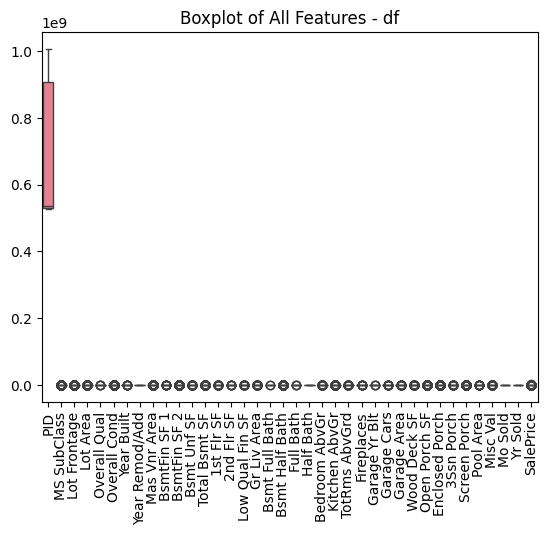

In [17]:
#plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Boxplot of All Features - df")
plt.savefig('box-whiskers-df.png')
plt.show()

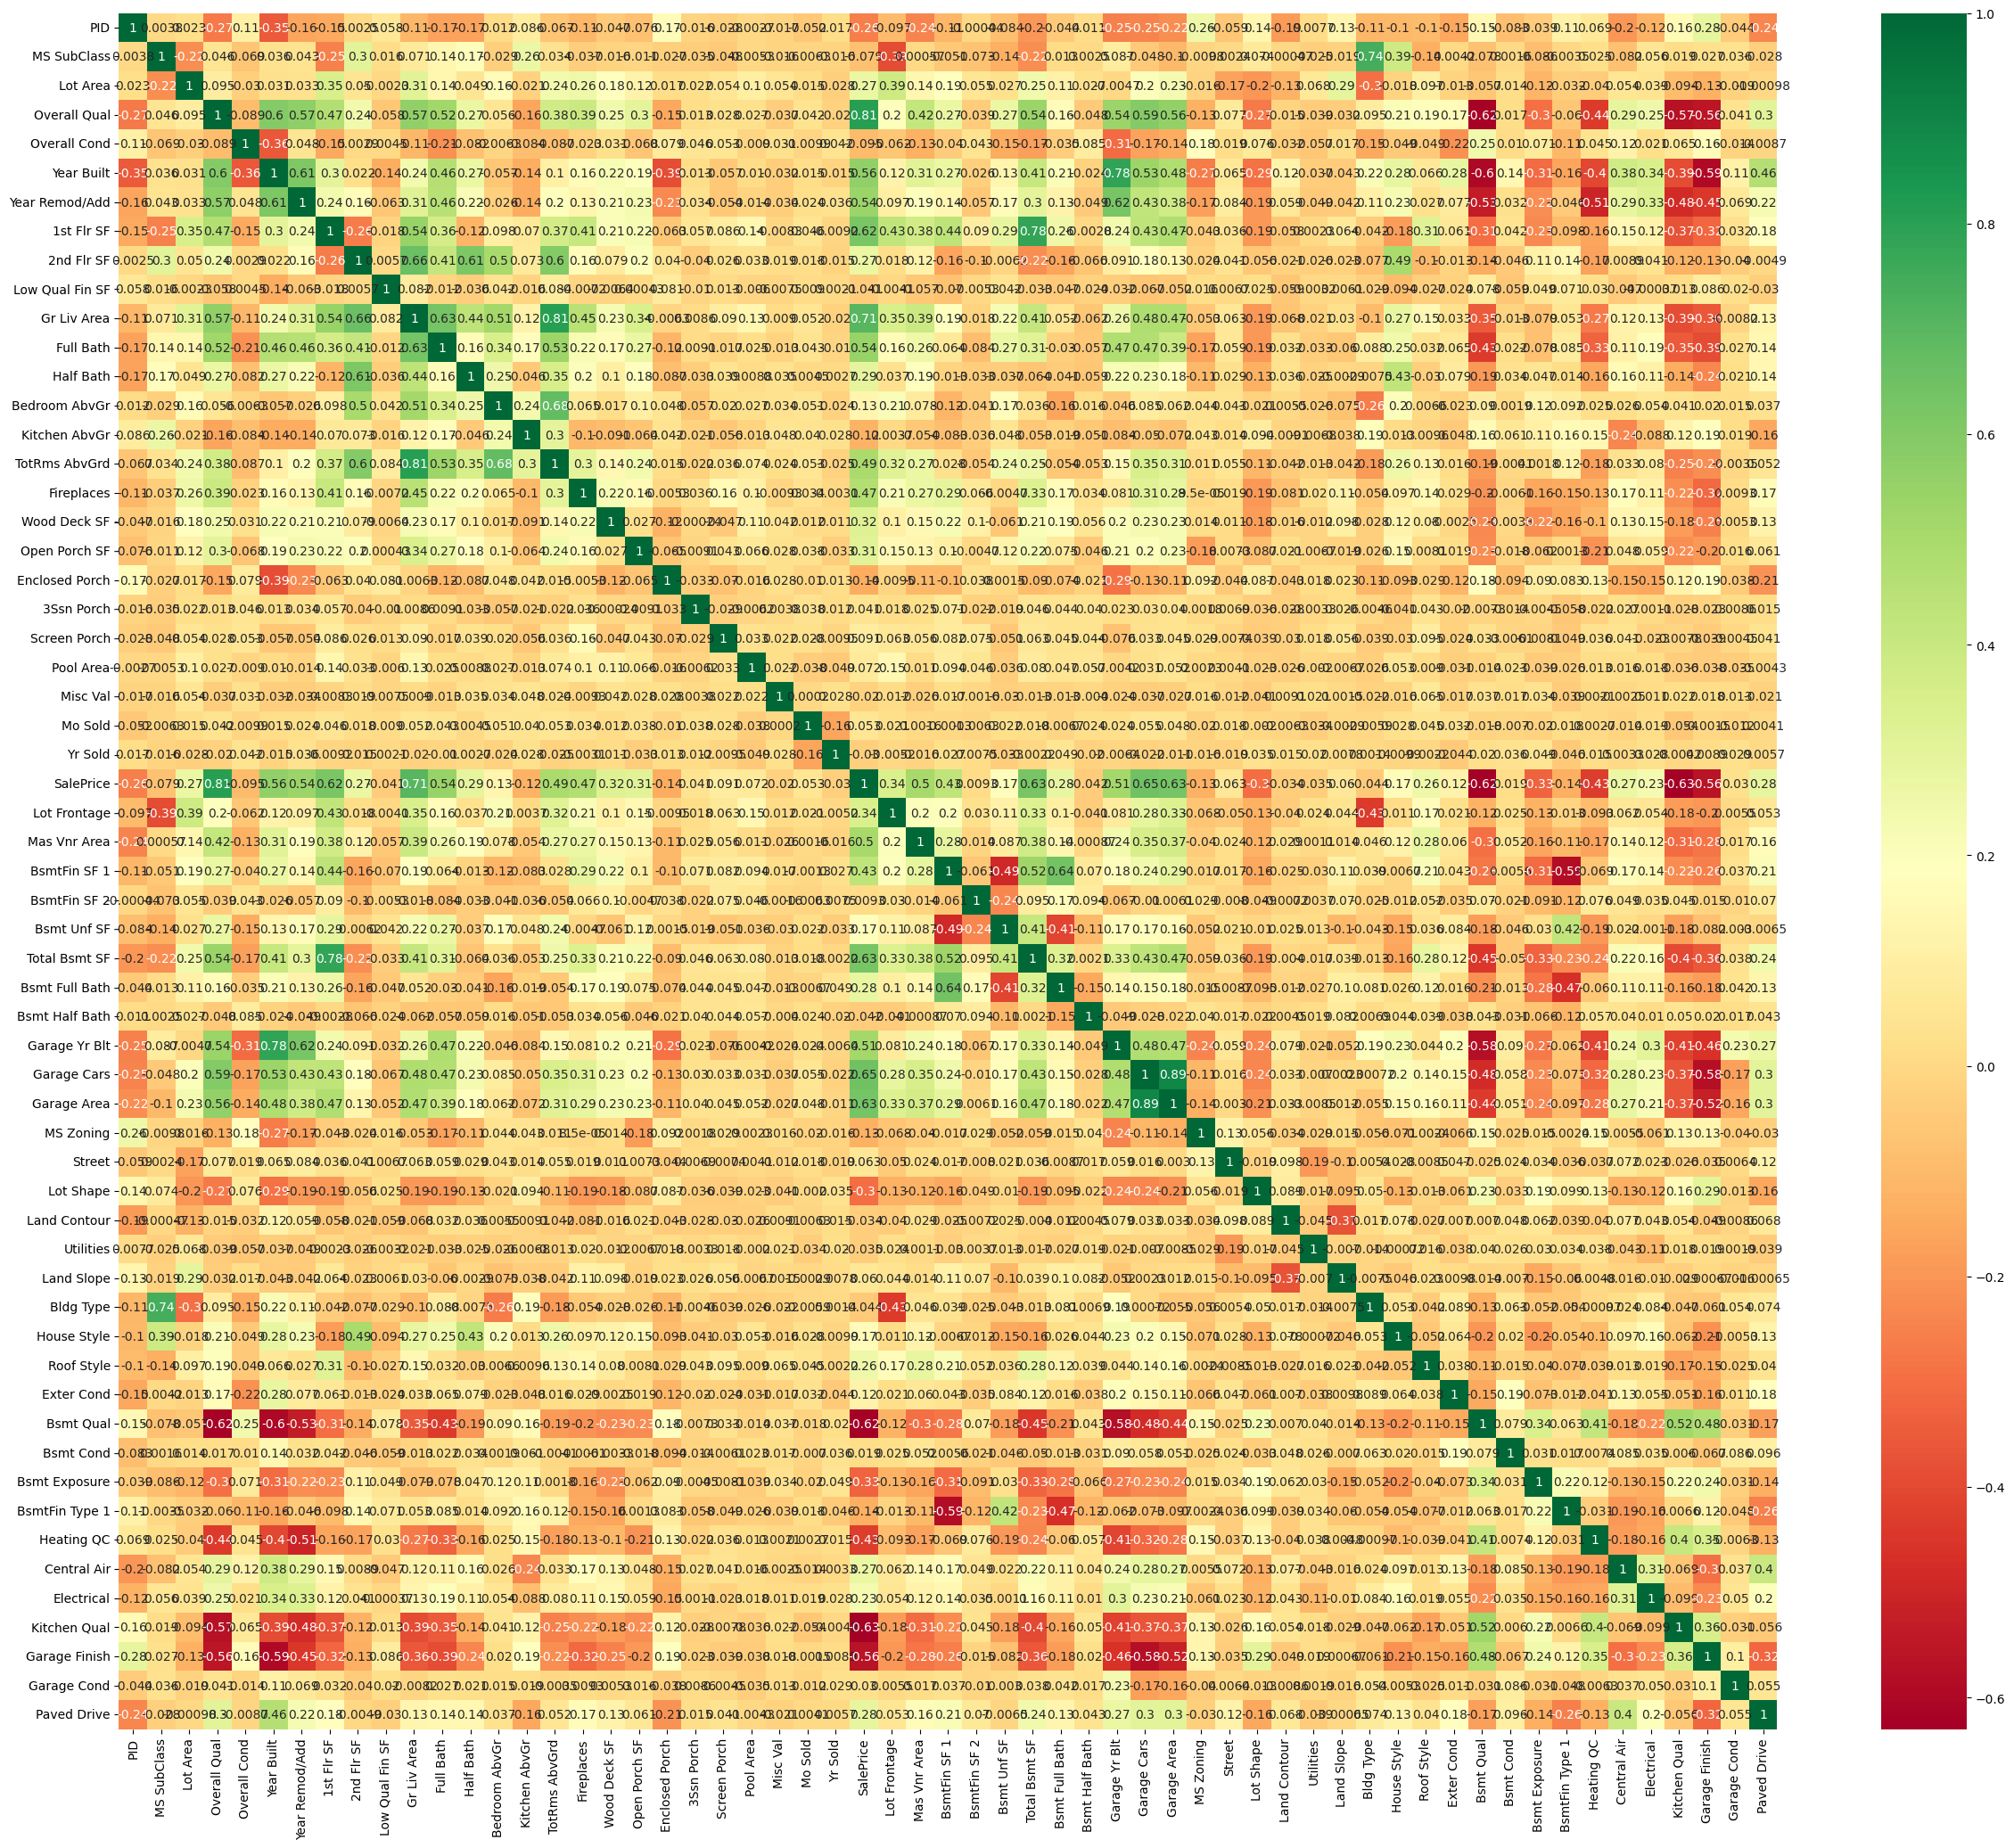

In [18]:
#copy data frame with only integer values for a correlation plot
corr = Combined.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr, annot=True, cmap='RdYlGn') ;
plt.savefig('combined-heat.png')

Too much detail to visually make sense of it

In [ ]:
sns.pairplot(df)
plt.savefig('pairplot.png')

## Data Processing

Regression analysis using Statsmodel

In [ ]:
#x is everything but the sales price- which is the key variable.
X = Combined.drop('SalePrice', axis = 1)
#y is the sales price which salesprice is the key variable
y = Combined['SalePrice']

In [ ]:
def rmspe(y_test, y_pred):
  '''
  This function takes y_test and y_pred and calculates the RMSPE'''
  return np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

In [ ]:
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {len(X.columns)}")

In [ ]:
plt.figure(figsize = (12,10));
plt.scatter(y_test,y_pred);
plt.plot([0, max(y_pred)],[0, max(y_pred)], c ='Red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig('plot-1.png')

In [ ]:
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

## Data Visualization

In [ ]:
import scipy.stats as stats
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()
plt.savefig('plot-2.png')

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;
plt.savefig('plot-3.png')

## Conclusion

Regarding a goal of minimizing the root mean squared percentage error (RMSPE) on the prediction of the house sales price, this is model is uncertain as the results report that there was no constant.

If ‘R is a measure of the goodness of fit of a model. In regression, the R coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R of 1 indicates that the regression predictions perfectly fit the data.’ - https://www.learningaboutelectronics.com/Articles/R-squared-calculator.php  

Therefore, with the value of .98, this model fits very well with the training data. I submit to my limit of understanding for where errors may lie.

A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .
